# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [193]:
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_theme()


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [194]:
df = pd.read_csv('../data/states_edu.csv')
original_df = pd.read_csv('../data/states_edu.csv')
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [195]:
df.rename({
    'GRADES_PK_G':'PREK_COUNT',
    'GRADES_KG_G':'KINDER_COUNT',
    'GRADES_4_G':'G4_COUNT',
    'GRADES_8_G':'G8_COUNT',
    'GRADES_12_G':'G12_COUNT',
    'GRADES_1_8_G':'PRIMARY_COUNT',
    'GRADES_9_12_G':'HS_COUNT',
    'GRADES_ALL_G':'ALL_COUNT',
    'ENROLL':'ALL_EST_COUNT'
    },
    axis=1,inplace=True)

In [196]:
# dropping all the rows with any incomplete data for now 
df.isna().sum()
df = df.dropna()
original_df = original_df.dropna()
df

,PRIMARY_KEY,STATE,YEAR,ALL_EST_COUNT,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G4_COUNT,G8_COUNT,G12_COUNT,PRIMARY_COUNT,HS_COUNT,ALL_COUNT,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


In [197]:
df.iloc[::-1, 0] #checking how recent the data goes up to
#found that it is 2019

1223          2015_WYOMING
1222        2015_WISCONSIN
1221    2015_WEST_VIRGINIA
1220       2015_WASHINGTON
1219         2015_VIRGINIA
               ...        
565        2003_CALIFORNIA
564          2003_ARKANSAS
563           2003_ARIZONA
562            2003_ALASKA
561           2003_ALABAMA
Name: PRIMARY_KEY, Length: 355, dtype: object

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [198]:
num_years = len(df.loc[:, "YEAR"].unique())
display(df.loc[:, "YEAR"].unique())
print(num_years)
# This is pretty terrible because most of the data is gone due
# to filtering out the NA values, but I will use this for now
# and fill in missing values later

array([2003, 2005, 2007, 2009, 2011, 2013, 2015])

7


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [199]:
ohio = df[df["STATE"] == "OHIO"]["AVG_MATH_8_SCORE"].mean()
print("Ohio Average: ", ohio)

mich = df[df["STATE"] == "MICHIGAN"]["AVG_MATH_8_SCORE"].mean()
print("Michigan Average: ", mich)
print("Ohio is higher unfortunately")


Ohio Average:  285.7142857142857
Michigan Average:  278.0
Ohio is higher unfortunately


Find the average for your outcome score across all states in 2019

In [200]:
avg_all = df["AVG_MATH_8_SCORE"].mean()
print("Average for all states", avg_all)

Average for all states 280.9802816901408


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [201]:
gb = df.groupby("STATE")
gb["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              276.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    265.0
FLORIDA                 281.0
GEORGIA                 279.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             271.0
MISSOURI                286.0
MONTANA                 293.0
NEBRASKA                286.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_MEXICO              274.0
NEW_YORK                283.0
NORT

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [202]:
df.keys() # looking at everything I have to work with 

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ALL_EST_COUNT', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'PREK_COUNT', 'KINDER_COUNT', 'G4_COUNT',
       'G8_COUNT', 'G12_COUNT', 'PRIMARY_COUNT', 'HS_COUNT', 'ALL_COUNT',
       'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE',
       'AVG_READING_8_SCORE'],
      dtype='object')

In [203]:
from sklearn.preprocessing import StandardScaler
import copy
df["EXP/ENROLL"] = df["TOTAL_EXPENDITURE"]/ df["ALL_COUNT"]
normed_columns = ['EXP/ENROLL', 'AVG_READING_8_SCORE', 'AVG_MATH_4_SCORE']

/var/folders/5y/zspn_1xn2d118d01pml1pq5c0000gn/T/ipykernel_10040/4020310023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EXP/ENROLL"] = df["TOTAL_EXPENDITURE"]/ df["ALL_COUNT"]


In [207]:

scaler = StandardScaler()
scaler.fit(df[normed_columns])
df[normed_columns] = scaler.transform(df[normed_columns])
df

/var/folders/5y/zspn_1xn2d118d01pml1pq5c0000gn/T/ipykernel_10040/368286176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[normed_columns] = scaler.transform(df[normed_columns])


,PRIMARY_KEY,STATE,YEAR,ALL_EST_COUNT,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G8_COUNT,G12_COUNT,PRIMARY_COUNT,HS_COUNT,ALL_COUNT,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXP/ENROLL
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,59663.0,42005.0,466920.0,205907.0,731220.0,-2.416324,262.0,207.0,-1.587716,-1.335320
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,11140.0,8651.0,82337.0,40238.0,133933.0,-0.899982,279.0,212.0,-1.138363,0.092684
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76376.0,68815.0,613442.0,307272.0,1012068.0,-1.506519,271.0,209.0,-1.288147,-1.667317
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,37004.0,28840.0,281834.0,132712.0,454523.0,-1.506519,266.0,214.0,-0.838793,-1.368861
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,500143.0,395194.0,3929869.0,1854518.0,6413867.0,-1.809787,267.0,206.0,-1.887285,-0.716738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,95221.0,90391.0,772414.0,386781.0,1283590.0,1.222899,288.0,229.0,0.509267,0.251183
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,79483.0,89258.0,656797.0,336808.0,1087030.0,0.919630,287.0,226.0,0.509267,0.246889
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,20426.0,18432.0,162070.0,80142.0,277452.0,-0.596713,271.0,216.0,-0.539224,0.234006
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,61084.0,66253.0,489919.0,263896.0,867800.0,0.616361,289.0,223.0,0.958621,0.478555


Feature engineering justification: **<I seperated the current df from an original_df so that I can see the effects of standardization and make sure that they look the same in the visualizations. I tried making a deepcopy with the copy library but couldn't get it to work so instead I just made another variable at the beginning of the notebook. 

Besides standardizing the quantities that I am interested in, I also created a new column called "EXP/ENROLL" which takes the total expenditure per student enrolled in a given state and year. I think by dividing expenditure by the number of students, it will create a more accurate prediction since spending more money has varying affects based on how many students are in the state.>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

/Users/neeyammuddappa/Downloads/2023-Tutorials-main/env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


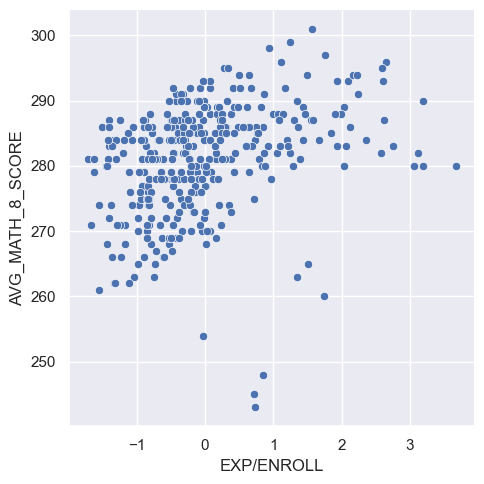

In [212]:
sns.relplot(
    data=df,
    x="EXP/ENROLL", y="AVG_MATH_8_SCORE"
)

**This definetly is not bad, just based on expenditure we are able to see a very reasonable correlation to math 8 scores. I think that dividing by enrollment definetly helped in this regard, because I remember the raw expenditures from the tutorial having absolutely no correlation.**

**Visualization 2**

/Users/neeyammuddappa/Downloads/2023-Tutorials-main/env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


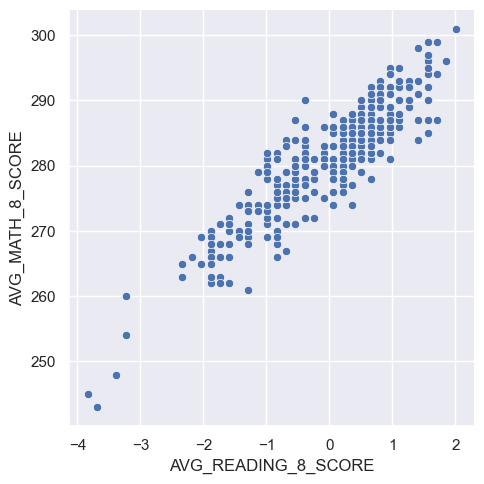

In [295]:
sns.relplot(
    data=df,
    x="AVG_READING_8_SCORE", y="AVG_MATH_8_SCORE"
)

**Using the average reading score to predict the average math score almost feels like cheating, its an obvious trend both intuitively and quantitatively shown by the data. I think these are the two metrics I will use to train and test my data. **

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [296]:
from sklearn.model_selection import train_test_split

In [297]:
X = df[['EXP/ENROLL','AVG_MATH_4_SCORE','AVG_READING_8_SCORE']]
y = df.loc[X.index]['AVG_MATH_8_SCORE']

At this moment I realized that a better approach would have been to only drop rows of data that had NA values in columns that I cared about/ am using to train and test. At the beginning I decided to drop all rows with NA values in ANY column which doesn't really make sense. I will take this into consideration in the future. 

In [298]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [299]:
# import your sklearn class here
from sklearn import linear_model

In [300]:
# create your model here
model = linear_model.Ridge(alpha=400S)

SyntaxError: invalid decimal literal (959672217.py, line 2)

In [301]:
model.fit(X_train, y_train)

Ridge(alpha=400)

In [302]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [303]:
# R^2 error
model.score(X_test, y_test) 

0.7463895804284275

In [304]:
# mean error
np.mean(model.predict(X_test)-y_test)

-0.23685607117294108

In [305]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

3.201592385313811

In [306]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

3.913403734384235

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

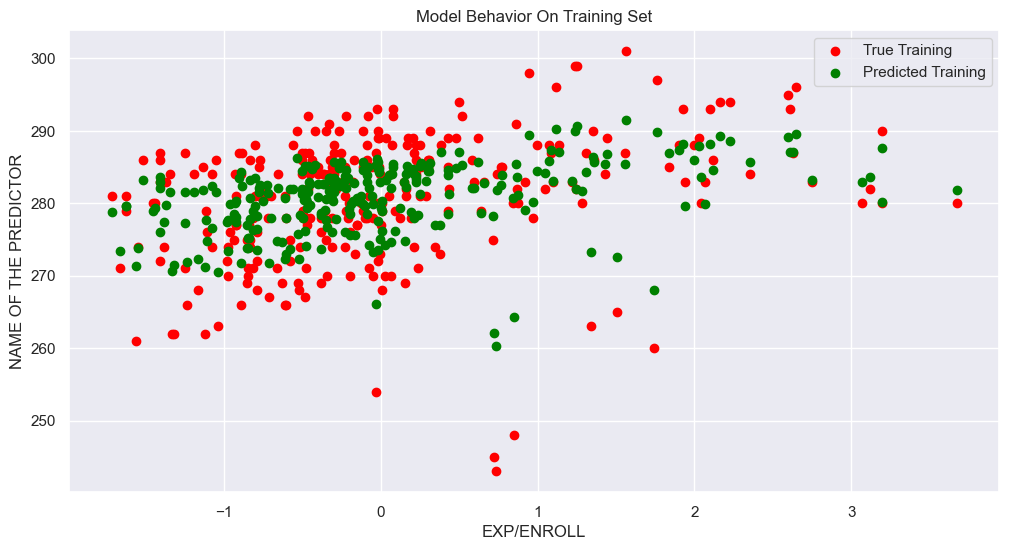

In [307]:
import matplotlib.pyplot as plt
# I was using seaborn just to be different 
col_name = 'EXP/ENROLL'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

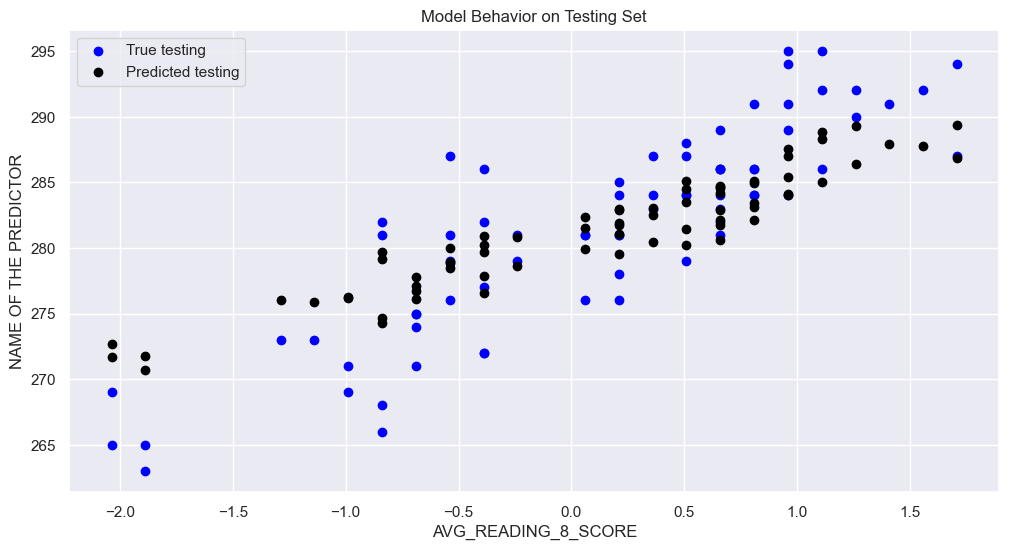

In [308]:
col_name = "AVG_READING_8_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

So the first thing I want to point out is my decision to use ridge regression instead of ordinary least squares regression. After reading about what different regression models do, I thought that penallizing coefficients that were too high would be important because there were several outliers in the expenditure per enrollment category that I didn't want to be reflected in the predictions. 

To my understanding, this penalization is controlled by the alpha value which I played around with. Originally I kept it at a default of 0.5, which had a good R^2 correlation of >0.9, but the predictions were clearly trying to compensate for the small quantitiy of abnormally low scores. After around the alpha value to around 400, I noticed the quantitative accuracy decreased, but it definetly did a better job of fitting the bulk of the data which is what my goal was from using ridge regression. 

There are definetly things I learned along the way such as not dropping all columns with NA values, and perhaps choosing a smaller trend to focus on instead of creating a general trend for all states. I may have been able to find more specific and interesting trends. 